# Cargando las librerias requeridas

In [1]:
import numpy as np
import pandas as pd
import plotnine as ptn

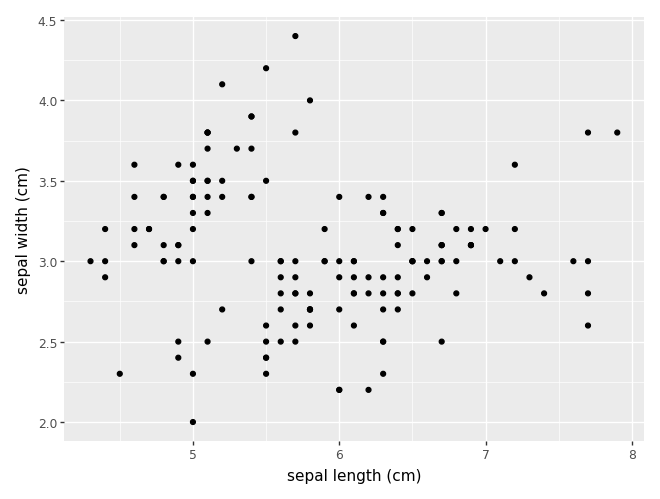

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

tempDF = pd.DataFrame(data    = iris.data,
                      columns = iris.feature_names)

(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "sepal length (cm)", y = "sepal width (cm)") +
    ptn.geom_point()
)

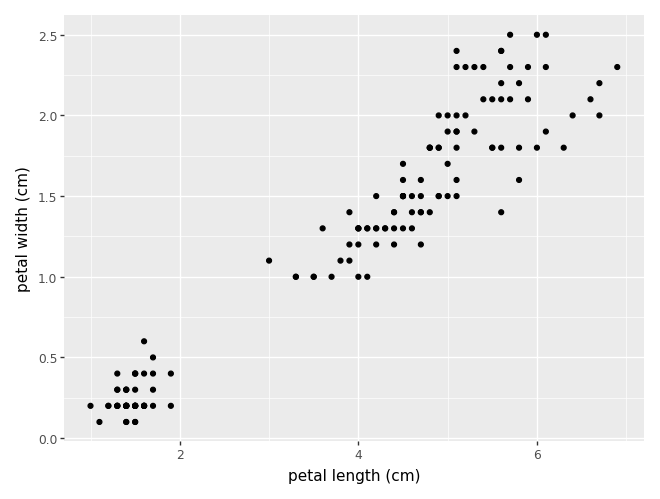

In [3]:
(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "petal length (cm)", y = "petal width (cm)") +
    ptn.geom_point()
)

In [4]:
# Entrenando un modelo con todos los datos y prediciendo los valores
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5,
                           weights     = "uniform")

KNN = KNN.fit(X = iris.data,
              y = iris.target)

prediccion = KNN.predict(X = iris.data)
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# sklearn.metrics

El módulo metrics de `sklearn` contiene un gran número de métricas ya implementadas.

La mayoría de estas funciones  solo necesitan las clases originales y predichas.

## Accuracy

``` python
accuracy_score(y_true,
               y_pred)
```

donde:

- `y_true`: Etiqueta reales.
- `y_pred`: Etiqueta predichas por algún modelo.

## Precision

### Clase binarias

``` python
precision_score(y_true,
                y_pred,
                pos_label = 1,
                average   = 'binary')
```

donde:

- `y_true`: etiqueta reales.
- `y_pred`: etiqueta predichas por algún modelo.
- `pos_label`: etiqueta a considerar como verdadera en un problema binario (2 clases).
- `average`: 
    - "binary": muestra la precisión considerando la clase de pos_label como verdadera.
    - None: muestra la precisión considerando cada clase como verdadera.


### Múltiples clases

``` python
precision_score(y_true,
                y_pred,
                labels  = None,
                average = 'binary')
```

donde:

- `y_true`: etiqueta reales.
- `y_pred`: etiqueta predichas por algún modelo.
- `labels`: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
- `average`:
    - 'binary': valor por default, produce error al tener múltiples clases.
    - 'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
    - 'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
    - 'weighted': calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
    - None: muestra la precisión considerando cada clase como verdadera.

In [5]:
from sklearn import metrics as mt

# Promedio 
print("Accuracy del modelo:", mt.accuracy_score(y_true = iris.target,
                                                y_pred = prediccion))

print("Presición del modelo, para la clase 0 (binaria):", mt.precision_score(y_true    = iris.target == 0,
                                                                             y_pred    = prediccion == 0,
                                                                             pos_label = 1,
                                                                             average   = "binary"))

print("Presición del modelo, para la clase 1 (binaria):", mt.precision_score(y_true    = iris.target == 1,
                                                                             y_pred    = prediccion == 1,
                                                                             pos_label = 1,
                                                                             average   = "binary"))

print("Presición del modelo, para la clase 2 (binaria):", mt.precision_score(y_true    = iris.target == 2,
                                                                             y_pred    = prediccion == 2,
                                                                             pos_label = 1,
                                                                             average   = "binary"))

print("Presición del modelo, para cada clase:", mt.precision_score(y_true  = iris.target,
                                                                   y_pred  = prediccion,
                                                                   labels  = [0, 1, 2],
                                                                   average = None))

Accuracy del modelo: 0.9666666666666667
Presición del modelo, para la clase 0 (binaria): 1.0
Presición del modelo, para la clase 1 (binaria): 0.9591836734693877
Presición del modelo, para la clase 2 (binaria): 0.9411764705882353
Presición del modelo, para cada clase: [1.         0.95918367 0.94117647]


## Recall

``` python
recall_score(y_true,
             y_pred,
             labels    = None,
             pos_label = 1,
             average   = 'binary')
```

donde:

- `y_true`: etiqueta reales.
- `y_pred`: etiqueta predichas por algún modelo.
- `pos_label`: etiqueta a considerar como verdadera en un problema binario (2 clases).
- `labels`: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
- `average`:
    - 'binary': valor por default, produce error al tener múltiples clases.
    - 'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
    - 'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
    - 'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
    - None: muestra la precisión considerando cada clase como verdadera.

## F1-Score

``` python
f1_score(y_true,
         y_pred,
         labels    = None,
         pos_label = 1,
         average   ='binary')
```

donde:

- `y_true`: etiqueta reales.
- `y_pred`: etiqueta predichas por algún modelo.
- `pos_label`: etiqueta a considerar como verdadera en un problema binario (2 clases).
- `labels`: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
- `average`:
    - 'binary': valor por default, produce error al tener múltiples clases.
    - 'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
    - 'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
    - 'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
    - None: muestra la precisión considerando cada clase como verdadera.

In [6]:
from sklearn import metrics as mt

print("Presición del modelo, para cada clase:", mt.precision_score(y_true  = iris.target,
                                                                   y_pred  = prediccion,
                                                                   labels  = [0, 1, 2],
                                                                   average = None))

print("Recall del modelo para cada clase:", mt.recall_score(y_true  = iris.target,
                                                            y_pred  = prediccion,
                                                            labels  =[0, 1, 2],
                                                            average = None))

print("F1-score del modelo para cada clase:", mt.f1_score(y_true  = iris.target,
                                                          y_pred  = prediccion,
                                                          labels  = [0, 1, 2],
                                                          average = None))

Presición del modelo, para cada clase: [1.         0.95918367 0.94117647]
Recall del modelo para cada clase: [1.   0.94 0.96]
F1-score del modelo para cada clase: [1.         0.94949495 0.95049505]


# Curva ROC

Para generar la curva ROC es necesario calcular el _true_ y _false positive rate_ para los distintos threshold.

Este proceso se realiza con la función `roc_curve` de la librería `metrics`.

``` python
roc_curve(y_true,
          y_score,
          pos_label = None)
```

donde:

- `y_true`: etiqueta reales.
- `y_score`: un score predicho por algún modelo.
- `pos_label`: etiqueta a considerar como verdadera en un problema binario (2 clases).


Retorna:

- `fpr`: Los valores de false positive rate para los threshold definidos por la función.
- `tpr`: Los valores de true positive rate para los threshold definidos por la función.
- `thresholds`: límites definidos por la función.

Otra función importante de `metrics` es `auc(x, y)`, la cual calcula el área bajo la curva para los valores de 'x' e 'y'.

``` python
auc(x, y)
```

donde:

- `x`: Coordenadas del eje **X** debe ser monótonamente creciente o decreciente.
- `y`: Coordenadas del eje **Y**.

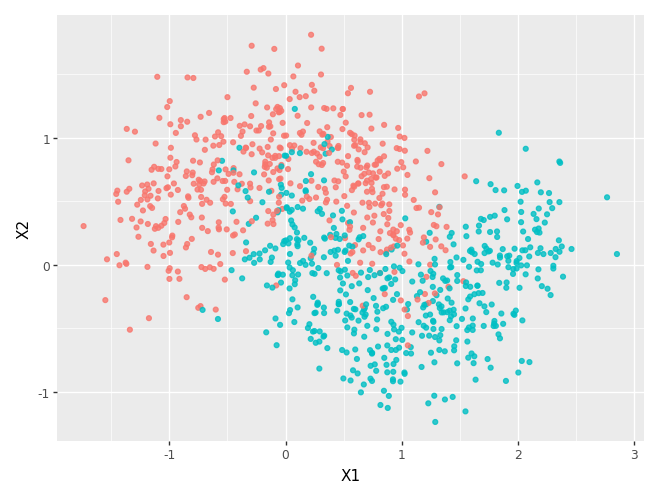

In [7]:
# Generando dos lunas
from sklearn.datasets import make_moons

tempData = make_moons(n_samples    = 1000,
                      shuffle      = True,
                      noise        = 0.3,
                      random_state = 10)

tempDF = pd.DataFrame(data    = tempData[0],
                      columns = ["X1", "X2"])

tempDF['Labels'] = tempData[1]

(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "X1", y = "X2", color = "factor(Labels)") +
    ptn.geom_point(show_legend = False, alpha = 0.8)
)

In [8]:
# Aplicando el modelo
KNN = KNeighborsClassifier(n_neighbors = 10,
                           weights     = "uniform")

KNN = KNN.fit(X = tempData[0],
              y = tempData[1])

prediccion = KNN.predict_proba(X = tempData[0])

In [9]:
prediccion

array([[0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       ...,
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [10]:
prediccion[:,1]

array([1. , 1. , 0.8, 0. , 1. , 1. , 0. , 0.5, 0. , 0. , 0.9, 0. , 0. ,
       1. , 0. , 0. , 0.8, 0.7, 0.9, 0. , 0.9, 0. , 0.1, 0.6, 0. , 0.8,
       0. , 1. , 0. , 1. , 0. , 0.9, 0.2, 0.8, 0. , 0.2, 0. , 1. , 0. ,
       1. , 0. , 1. , 0.9, 0.4, 0. , 1. , 1. , 1. , 0.1, 1. , 0.1, 0. ,
       0.3, 0. , 0.1, 0. , 0. , 0. , 0.5, 0.7, 1. , 1. , 1. , 1. , 0.7,
       1. , 0.9, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0.1, 1. , 0.4,
       0. , 0.9, 1. , 0.3, 0.9, 0. , 0. , 0.3, 0.8, 0.9, 1. , 0. , 0.9,
       0.1, 0. , 0.1, 0.9, 0. , 0.9, 0.8, 0. , 0.9, 0. , 0.9, 1. , 1. ,
       0.9, 0.8, 0.4, 0. , 0. , 0. , 0.2, 0. , 0. , 1. , 1. , 0.1, 0.8,
       0.9, 1. , 0. , 1. , 0.7, 0.1, 0.1, 1. , 0.2, 0. , 0.8, 1. , 1. ,
       0. , 0. , 1. , 1. , 0.1, 1. , 1. , 1. , 1. , 0. , 1. , 0.9, 0.9,
       0. , 1. , 1. , 1. , 0.7, 0. , 0. , 1. , 0. , 1. , 1. , 0.1, 1. ,
       0.9, 1. , 0. , 0.9, 0.1, 1. , 0.4, 0. , 0.6, 0. , 0.7, 0.6, 0.9,
       0.9, 0.9, 0. , 0. , 0.5, 0.5, 0. , 1. , 0. , 0.3, 0. , 1.

Límites [inf 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


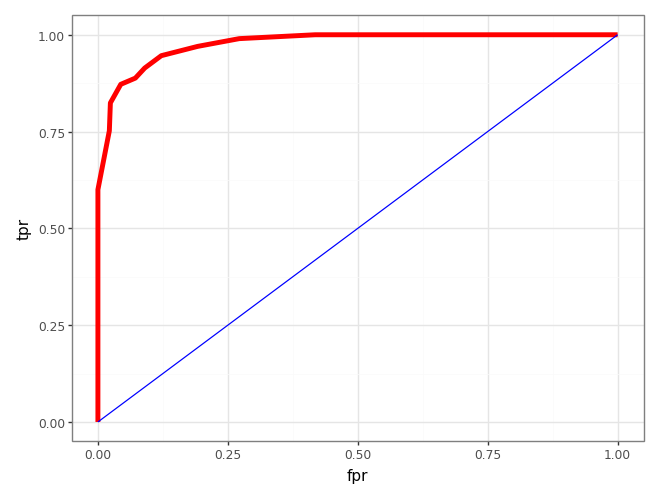

In [11]:
# Calculando los tpr and fpr
from sklearn import metrics as mt

fpr, tpr, thresholds = mt.roc_curve(y_true  = tempData[1],
                                    y_score = prediccion[:,1])

print("Límites", thresholds)

tempDF = pd.DataFrame(data    = zip(fpr, tpr),
                      columns = ["fpr", "tpr"])

# Curva ROC
(
    ptn.ggplot(data = tempDF) + 
    ptn.aes(x = "fpr", y = "tpr") +
    ptn.geom_line(color = "red", size = 2) +
    ptn.annotate("segment", x = 0, y = 0, xend = 1, yend = 1, color = "blue") +
    ptn.theme_bw()
)

In [12]:
fpr

array([0.   , 0.   , 0.022, 0.024, 0.044, 0.072, 0.09 , 0.122, 0.192,
       0.272, 0.418, 1.   ])

In [13]:
tpr

array([0.   , 0.6  , 0.752, 0.824, 0.872, 0.888, 0.914, 0.946, 0.97 ,
       0.99 , 1.   , 1.   ])

In [14]:
tempDF

,fpr,tpr
0,0.000,0.000
1,0.000,0.600
2,0.022,0.752
3,0.024,0.824
4,0.044,0.872
5,0.072,0.888
6,0.090,0.914
7,0.122,0.946
8,0.192,0.970
9,0.272,0.990


In [15]:
# Valor del AUC
print("Valor del AUC:", mt.auc(x = fpr,
                               y = tpr))

Valor del AUC: 0.9767560000000001


# Buscando el mejor límite

El mejor límite posible está dado por un alto `tpr` y un bajo `fpr`.

Podemos buscar este valor a través del `g-means`, `Youden’s J statistic`, o simplemente en forma visual, a través de un gráfico de los `tpr` y `1 - fpr` en un mismo gráfico y ver donde se intersectan.

In [16]:
#gmeans
gmeans = np.sqrt(tpr * (1 - fpr))
ix     = np.argmax(gmeans)
print("El mejor threshold según g-means es: ", thresholds[ix])

J  = tpr - fpr
ix = np.argmax(J)
print("El mejor threshold según Youden es: ", thresholds[ix])

El mejor threshold según g-means es:  0.7
El mejor threshold según Youden es:  0.7


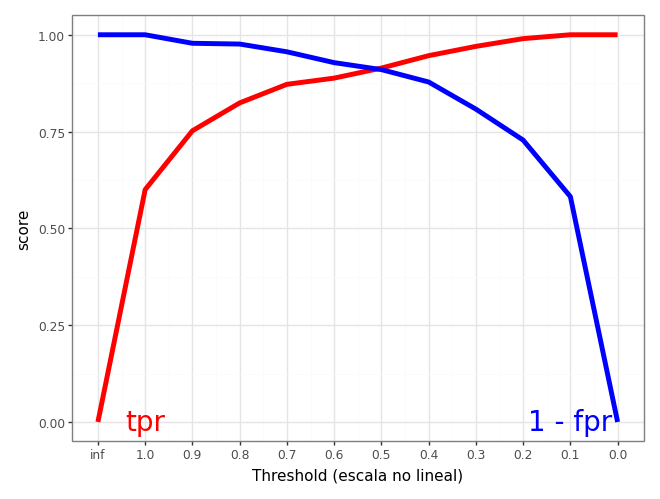

In [17]:
fpr, tpr, thresholds = mt.roc_curve(y_true  = tempData[1],
                                    y_score = prediccion[:, 1])

tempDF = pd.DataFrame(data    = zip(fpr, tpr),
                      columns = ["fpr", "tpr"])

(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = range(len(thresholds))) +
    ptn.theme_bw() +
    ptn.geom_line(ptn.aes(y = tpr), color = "red", size = 2) +
    ptn.geom_line(ptn.aes(y = 1 - fpr), color = "blue", size = 2) +
    ptn.annotate("text", label = "tpr", x = 1, y = 0, color = "red", size = 20) +
    ptn.annotate("text", label = "1 - fpr", x = len(thresholds) - 2, y = 0, color = "blue", size = 20) +
    ptn.scale_x_continuous(labels = thresholds, breaks = range(len(thresholds))) +
    ptn.labs(x = "Threshold (escala no lineal)", y = "score")
)

In [19]:
thresholds

array([inf, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [20]:
print("Valor del límite (no sigue una escala): ", thresholds[4])
print(fpr[4], tpr[4])

Valor del límite (no sigue una escala):  0.7
0.044 0.872


# Función train_test_split

La función `train_test_split` de `sklearn.model_selection` nos permite separar los datos en entrenamiento y test.

``` python
train_test_split(*arrays,
                 test_size    = None,
                 train_size   = None,
                 random_state = None,
                 shuffle      = True,
                 stratify     = None)
```

donde:

- `*arrays`: Arreglos con los datos a separar.
- `test_size`: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de test. Si no se define es el complemento de train_size.
- `train_size`: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de entrenamiento. Si no se define es el complemento de test_size.
- `random_state`: valor entero, permite replicar un experimiento al setear la semilla de los números aleatorios.
- `shuffle`: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.
- `stratify`: Arreglo con etiquetas. En el caso que se entregue la separación matiene la porporcion de las etiquetas en cada muestra.


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size    = 0.33,
                                                    random_state = 123,
                                                    stratify     = iris.target)

In [22]:
from collections import Counter

counter = Counter(y_train)
total   = sum(counter.values())

for c, count in counter.items():
    print(f"Clase {c}: {count} ({count/total*100:.2f}%)")


Clase 0: 34 (34.00%)
Clase 2: 33 (33.00%)
Clase 1: 33 (33.00%)


In [23]:
counter = Counter(y_test)
total   = sum(counter.values())

for c, count in counter.items():
    print(f"Clase {c}: {count} ({count/total*100:.2f}%)")

Clase 0: 16 (32.00%)
Clase 2: 17 (34.00%)
Clase 1: 17 (34.00%)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3,
                           weights     = "uniform")

KNN = KNN.fit(X = X_train,
              y = y_train)

In [25]:
# Aplicando el modelo a otros datos
prediccion = KNN.predict(X = X_train)

print("Accuracy del modelo, para cada clase: ", mt.accuracy_score(y_true = y_train,
                                                                  y_pred = prediccion))

print("Presición del modelo, para cada clase: ", mt.precision_score(y_true  = y_train,
                                                                    y_pred  = prediccion,
                                                                    labels  = [0, 1, 2],
                                                                    average = None))

print("Recall del modelo para cada clase: ", mt.recall_score(y_true  = y_train,
                                                             y_pred  = prediccion,
                                                             labels  = [0, 1, 2],
                                                             average = None))

print("F1-score del modelo para cada clase: ", mt.f1_score(y_true  = y_train,
                                                           y_pred  = prediccion,
                                                           labels  = [0, 1, 2],
                                                           average = None))

Accuracy del modelo, para cada clase:  0.95
Presición del modelo, para cada clase:  [1.         0.91176471 0.9375    ]
Recall del modelo para cada clase:  [1.         0.93939394 0.90909091]
F1-score del modelo para cada clase:  [1.         0.92537313 0.92307692]


In [26]:
# Aplicando el modelo a otros datos
prediccion = KNN.predict(X = X_test)

print("Accuracy del modelo, para cada clase: ", mt.accuracy_score(y_true = y_test,
                                                                  y_pred = prediccion))

print("Presición del modelo, para cada clase: ", mt.precision_score(y_true  = y_test,
                                                                    y_pred  = prediccion,
                                                                    labels  = [0, 1, 2],
                                                                    average = None))

print("Recall del modelo para cada clase: ", mt.recall_score(y_true  = y_test,
                                                             y_pred  = prediccion,
                                                             labels  = [0, 1, 2],
                                                             average = None))

print("F1-score del modelo para cada clase: ", mt.f1_score(y_true  = y_test,
                                                           y_pred  = prediccion,
                                                           labels  = [0, 1, 2],
                                                           average = None))

Accuracy del modelo, para cada clase:  0.96
Presición del modelo, para cada clase:  [1.         1.         0.89473684]
Recall del modelo para cada clase:  [1.         0.88235294 1.        ]
F1-score del modelo para cada clase:  [1.         0.9375     0.94444444]



# Curva de aprendizaje (muestras separadas)

In [27]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAcc = np.zeros((len(np.arange(0.05, 1.0, 0.05)), 1))
allStdAcc  = np.zeros((len(np.arange(0.05, 1.0, 0.05)), 1))

index  = 0
numExp = 20

# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05, 1.0, 0.05):
    
    tempVal = np.zeros((numExp, 1))
    
    # Iterando sobre el número de experimentos
    for j in range(numExp):
        
        # Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            train_size = 0.7)
        
        # El random state me permite que cada separación del i% sea la misma
        X_train, null, y_train, null = train_test_split(X_train,
                                                        y_train,
                                                        train_size   = i,
                                                        random_state = 42)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors = 3,
                                   weights     = "uniform")
        
        KNN = KNN.fit(X = X_train,
                      y = y_train)
        
        prediccion = KNN.predict(X = X_test)
        
        # Evaluando el modelo
        tempVal[j] = mt.accuracy_score(y_true = y_test,
                                       y_pred = prediccion)
    
    allMeanAcc[index] = tempVal.mean()
    allStdAcc[index]  = tempVal.std()
    
    index = index + 1

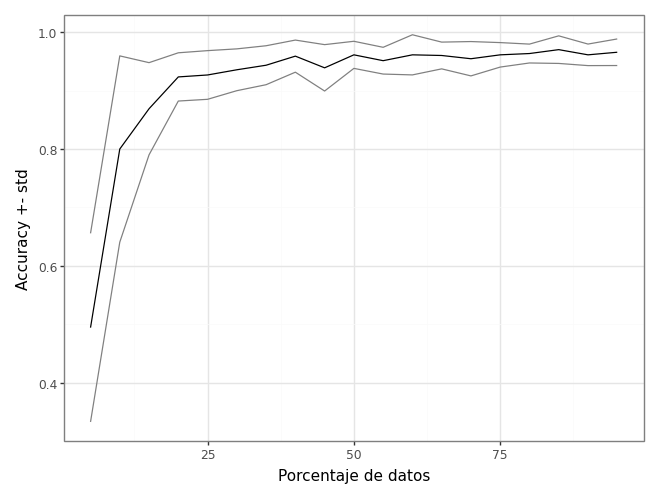

In [28]:
# Creando el dataframe a graficar
tempDF = pd.DataFrame(data    = allMeanAcc,
                      columns = ["mean"])

tempDF['std']  = allStdAcc
tempDF['ejeX'] = np.arange(0.05, 1.0, 0.05)*100

# Gráfico de los valores
(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "ejeX") +
    ptn.geom_line(ptn.aes(y = "mean-std"), color = "grey") +
    ptn.geom_line(ptn.aes(y = "mean+std"), color = "grey") +
    ptn.geom_line(ptn.aes(y = "mean"), color = "black") +
    ptn.labs(x = "Porcentaje de datos", y = "Accuracy +- std") +
    ptn.theme_bw()
)

#### Comparando curva de entrenamiento vs test

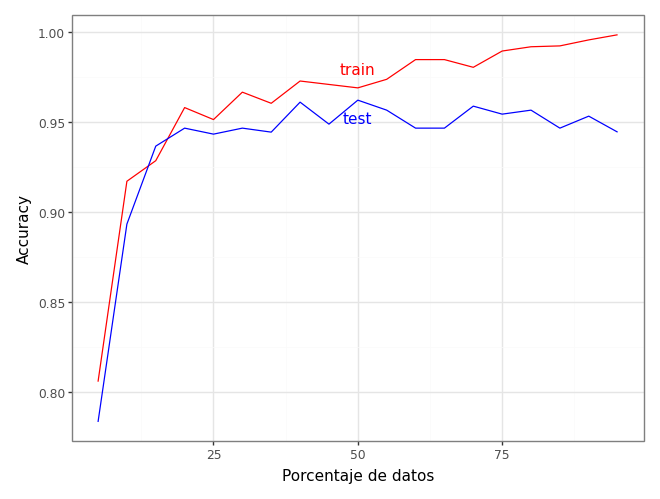

In [29]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAccTrain = np.zeros((len(np.arange(0.05, 1.0, 0.05)), 1))
allMeanAccTest  = np.zeros((len(np.arange(0.05, 1.0, 0.05)), 1))

index  = 0
numExp = 20

# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05, 1.0, 0.05):
    
    tempVal  = np.zeros((numExp, 1))
    tempVal2 = np.zeros((numExp, 1))
    
    # Iterando sobre el número de experimentos
    for j in range(numExp):
        
        # Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            train_size = 0.7)
        X_train2, null, y_train2, null = train_test_split(X_train,
                                                          y_train,
                                                          train_size   = i,
                                                          random_state = 42)
        
        # Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors = 1,
                                   weights     = "uniform")
        
        KNN = KNN.fit(X = X_train2,
                      y = y_train2)
        
        prediccion = KNN.predict(X = X_test)
        
        tempVal[j]  = mt.accuracy_score(y_true = y_test,
                                        y_pred = prediccion)
        
        prediccion  = KNN.predict(X = X_train)
        
        tempVal2[j] = mt.accuracy_score(y_true = y_train,
                                        y_pred = prediccion)
    
    allMeanAccTest[index]  = tempVal.mean()
    allMeanAccTrain[index] = tempVal2.mean()
    
    index = index + 1

 #Creando el dataframe a graficar
tempDF = pd.DataFrame(data    = allMeanAccTrain,
                      columns = ["meanTrain"])

tempDF['meanTest'] = allMeanAccTest
tempDF['ejeX']     = np.arange(0.05, 1.0, 0.05)*100

# Gráfico de los valores
(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "ejeX")+
    ptn.geom_line(ptn.aes(y = "meanTrain"), color = "red") +
    ptn.geom_line(ptn.aes(y = "meanTest"), color = "blue") +
    ptn.labs(x = "Porcentaje de datos", y = "Accuracy") +
    ptn.annotate("text", label = "train", x = 50, y = tempDF.meanTrain[9] + 0.01, color = "red") +
    ptn.annotate("text", label = "test", x = 50, y = tempDF.meanTest[9] - 0.01, color = "blue") +
    ptn.theme_bw()
)

# k-fold cross-validation

El objeto `KFold` de `sklearn.model_selection` permite separar los datos en `K-fold`.

A pesar de haber otras funciones que también permiten aplicar y evaluar *k-fold cross validation* en forma sencilla, esta separación/evaluación no se podría usar con otros modelos que no fueran de `sklearn`.

La función no separa los datos, simplemente retorna los índices de cada fold, la separación se hace de forma posterior.

``` python
KFold(n_splits     = 5,
      shuffle      = False,
      random_state = None)
```

donde:

- `n_splits`: número de folds a utilizar.
- `random_state`: valor entero, permite replicar un experimento al setear la semilla de los números aleatorios.
- `shuffle`: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.

## Métodos

- Generar los índices para separar los datos de entrenamiento y test

``` python
split()
```

In [30]:
# Creando el objeto con sus características 
from sklearn.model_selection import KFold

kf = KFold(n_splits     = 4,
           shuffle      = True,
           random_state = 246)
print(kf)

KFold(n_splits=4, random_state=246, shuffle=True)


In [31]:
# Generando los k-fold
temp = kf.split(iris.data)

for train_index, test_index in temp:
    
    print("TRAIN:", train_index, "\nTEST:", test_index,"\n\n")

TRAIN: [  1   2   3   5   7   8   9  10  11  12  13  16  17  19  22  23  24  25
  26  27  28  29  30  31  32  33  34  38  39  40  43  45  46  48  49  50
  51  53  54  55  57  58  59  60  61  62  63  64  65  68  69  70  71  72
  74  75  76  77  78  79  80  81  82  83  86  87  88  89  91  92  93  94
  96  99 100 101 102 103 104 107 108 109 110 112 114 118 120 122 123 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 145 146 148 149] 
TEST: [  0   4   6  14  15  18  20  21  35  36  37  41  42  44  47  52  56  66
  67  73  84  85  90  95  97  98 105 106 111 113 115 116 117 119 121 124
 144 147] 


TRAIN: [  0   1   3   4   6   8   9  10  12  14  15  17  18  20  21  22  25  26
  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  44  46  47
  48  49  50  52  53  54  55  56  58  59  63  64  65  66  67  68  71  72
  73  74  75  76  79  80  81  83  84  85  87  88  89  90  92  94  95  96
  97  98  99 100 102 103 104 105 106 107 108 109 110 111 113 114 115 116

In [32]:
# Analizando el error de un modelo
# Creando los objetos con sus características 
numFolds = 10

kf = KFold(n_splits = numFolds,
           shuffle  = True)

KNN = KNeighborsClassifier(n_neighbors = 10,
                           weights     = "uniform")

# Generando los k-fold
temp = kf.split(iris.data)

allAccTest = np.zeros((numFolds, 1))

index = 0

for train_index, test_index in temp:
    
    KNN = KNN.fit(X = iris.data[train_index, :],
                  y = iris.target[train_index])
    
    prediccion = KNN.predict(X = iris.data[test_index, :])
    
    allAccTest[index] = mt.accuracy_score(y_true = iris.target[test_index],
                                          y_pred = prediccion)
    
    index += 1

print("Average error: ", allAccTest.mean(), "+-", allAccTest.std())

Average error:  0.9600000000000002 +- 0.044221663871405324


# Buscando el mejor valor de K

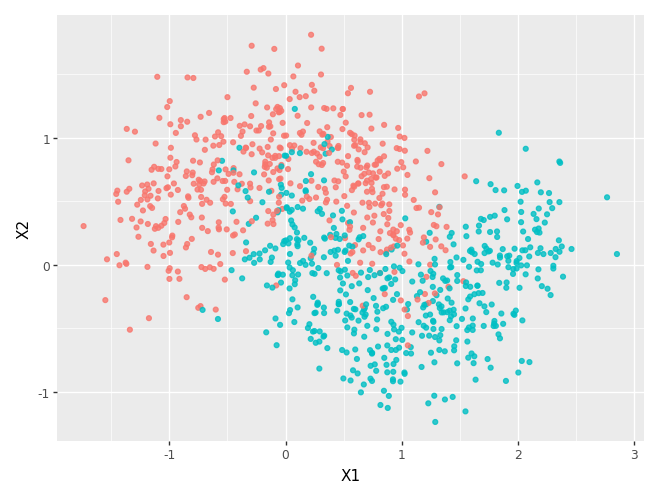

In [ ]:
# Generando dos lunas
from sklearn.datasets import make_moons

tempData = make_moons(n_samples    = 1000,
                      shuffle      = True,
                      noise        = 0.3,
                      random_state = 10)

tempDF = pd.DataFrame(zip(tempData[0][:,0],tempData[0][:,1],tempData[1]),columns=["X1","X2","Label"])

(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "X1", y = "X2", color = "factor(Label)") +
    ptn.geom_point(show_legend = False, alpha = 0.8)
)

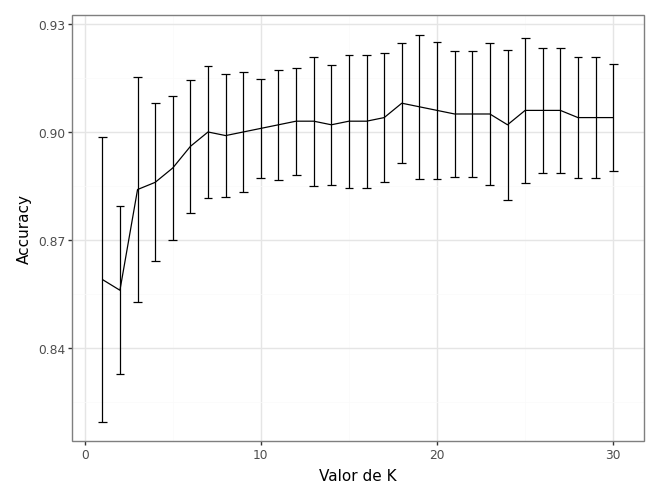

In [33]:
# Analizando el error de un modelo
# Creando los objetos con sus características 
maxK     = 30
numFolds = 10

kf = KFold(n_splits     = numFolds,
           shuffle      = True,
           random_state = 0)

allMeanTest = np.zeros((maxK, 1))
allStdTest  = np.zeros((maxK, 1))

for i in range(maxK):
    
    index = 0
    
    tempAcc = np.zeros((numFolds, 1))
    
    KNN = KNeighborsClassifier(n_neighbors = i + 1,
                               weights     = "uniform")
    
    for train_index, test_index in kf.split(tempData[0]):
        
        KNN = KNN.fit(X = tempData[0][train_index, :],
                      y = tempData[1][train_index])
        
        prediccion = KNN.predict(tempData[0][test_index, :])
        
        tempAcc[index] = mt.accuracy_score(y_true = tempData[1][test_index],
                                           y_pred = prediccion)
        
        index += 1
    
    allMeanTest[i] = tempAcc.mean()
    allStdTest[i]  = tempAcc.std()

# Creando el dataframe a graficar
tempDF = pd.DataFrame(data    = allMeanTest,
                      columns = ["meanTest"])

tempDF['stdTest'] = allStdTest
tempDF['ejeX']    = np.arange(1, maxK + 1, 1)

# Gráfico de los valores
(
    ptn.ggplot(data = tempDF) +
    ptn.aes(x = "ejeX", y = "meanTest", ymin = "meanTest-stdTest", ymax = "meanTest+stdTest") +
    ptn.geom_line() +
    ptn.geom_errorbar() + 
    ptn.labs(x = "Valor de K", y = "Accuracy") +
    ptn.theme_bw()
)